# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot, PredictionError


# Load and Explore the Data

In [2]:
# Load the dataset
df = pd.read_csv('IMDbMoviesIndia.csv', encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Data Preprocessing

In [6]:
df.drop(['Name', 'Year', 'Duration', 'Votes'],axis=1,inplace =True)
df.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
df.isnull().sum()

Genre       1877
Rating      7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
print('mean  -' +str(df.Rating.mean()))

print('median  -'+str(df.Rating.median()))

print('mode  -'+str(df.Rating.mode()))


mean  -5.841621416845562
median  -6.0
mode  -0    6.2
Name: Rating, dtype: float64


In [9]:
df.isnull().sum()

Genre       1877
Rating      7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.Genre.fillna('Unknown',inplace= True)
df.Rating.fillna(df.Rating.mean(),inplace=True)
df.Director.fillna('Unknown',inplace= True)
df['Actor 1'].fillna('Unknown',inplace= True)
df['Actor 2'].fillna('Unknown',inplace= True)
df['Actor 3'].fillna('Unknown',inplace= True)

In [11]:
df.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
genre_df = pd.DataFrame(df['Genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else []).tolist(), 
                        columns=[f'Genre_{i}' for i in range(3)])
genre_df = genre_df.applymap(lambda x: 1 if x != '' else 0)

df = pd.concat([df.drop('Genre', axis=1), genre_df], axis=1)


In [13]:
categorical_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [14]:
categorical_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

minmax_scaler = MinMaxScaler()

for column in categorical_columns:
    df[column] = minmax_scaler.fit_transform(df[column].values.reshape(-1, 1))


In [15]:
df.head()

,Rating,Director,Actor 1,Actor 2,Actor 3,Genre_0,Genre_1,Genre_2
0,5.841621,0.324352,0.476897,0.163566,0.644813,1,1,1
1,7.000000,0.260694,0.695210,0.979554,0.109336,1,1,1
2,5.841621,0.862748,0.786986,0.585974,0.715768,1,1,1
3,4.400000,0.558942,0.618270,0.307504,0.834025,1,1,1
4,5.841621,0.064837,0.659602,0.707831,0.084025,1,1,1


#  Split the Data into Training and Testing Sets

In [16]:
X=df.drop('Rating',axis=1)
y=df.Rating

In [17]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [18]:
X_train

,Director,Actor 1,Actor 2,Actor 3,Genre_0,Genre_1,Genre_2
3485,0.454025,0.893387,0.505009,0.797095,1,1,1
8701,0.426743,0.463968,0.028420,0.380083,1,1,1
11179,0.729539,0.210471,0.927827,0.237552,1,1,1
11628,0.820310,0.339763,0.569413,0.408506,1,1,1
4819,0.069889,0.873251,0.791454,0.515145,1,1,1
...,...,...,...,...,...,...,...
5191,0.409397,0.313480,0.775302,0.053942,1,1,1
13418,0.221455,0.815176,0.677980,0.436515,1,1,1
5390,0.504210,0.746715,0.226334,0.765353,1,1,1
860,0.778713,0.710471,0.418319,0.886307,1,1,1


In [19]:
y_train

3485     4.700000
8701     5.200000
11179    3.600000
11628    7.600000
4819     5.841621
           ...   
5191     5.841621
13418    5.841621
5390     6.100000
860      5.841621
7270     3.700000
Name: Rating, Length: 12407, dtype: float64

# Model Training

In [20]:
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Prediction results:", y_pred)
ms_error = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Validation Set: {ms_error}')

Prediction results: [5.9578655  5.97895642 5.99617889 ... 5.82852216 5.408365   5.92360123]
Mean Squared Error on Validation Set: 0.9278525629216677


# Evaluate the model's performance

In [21]:
y_pred= model.predict(X_test)

ms_error = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Validation Set: {ms_error}')

Mean Squared Error on Validation Set: 0.9278525629216677


In [22]:
rs_error = r2_score(y_test, y_pred)
print(f'R-squared Score: {rs_error}')

R-squared Score: 0.035974674815332786


E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


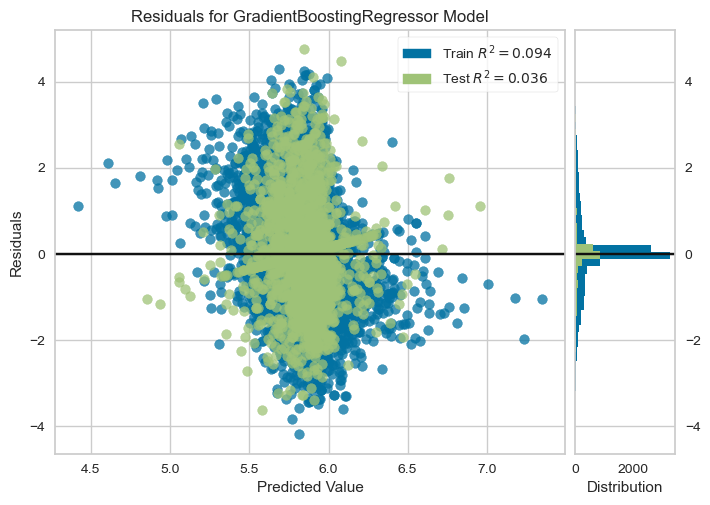

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [23]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


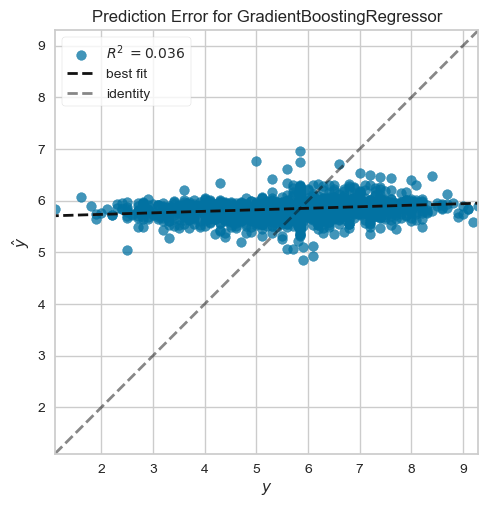

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [24]:
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()